In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import os
import cv2

from tqdm import tqdm
from time import time
import json 

import warnings
warnings.simplefilter("ignore")

with open('config.json') as f_in:
    config = json.load(f_in)


In [2]:
path_to_orthophoto_rgb = "donnees/BDORTHO/BDORTHO_2-0_RVB-0M50_JP2-E080_LAMB93_D035_2012-01-01/BDORTHO/1_DONNEES_LIVRAISON_2015-02-00365/BDO_RVB_0M50_JP2-E080_LAMB93_D35-2012/35-2012-0305-6780-LA93-0M50-E080.jp2"

In [3]:
Image.MAX_IMAGE_PIXELS = None

rgb_name = os.path.basename(path_to_orthophoto_rgb)
dept = rgb_name[:2]
year = rgb_name[3:7]

# Extract coordinates from RGB orthophoto path
rgb_x = path_to_orthophoto_rgb[config['rgb_coordinates_pos']: config['rgb_coordinates_pos']+3]
rgb_y = path_to_orthophoto_rgb[config['rgb_coordinates_pos']+4: config['rgb_coordinates_pos']+8]

# Open and resize RGB images
ortho_rgb = np.asarray(Image.open(path_to_orthophoto_rgb))

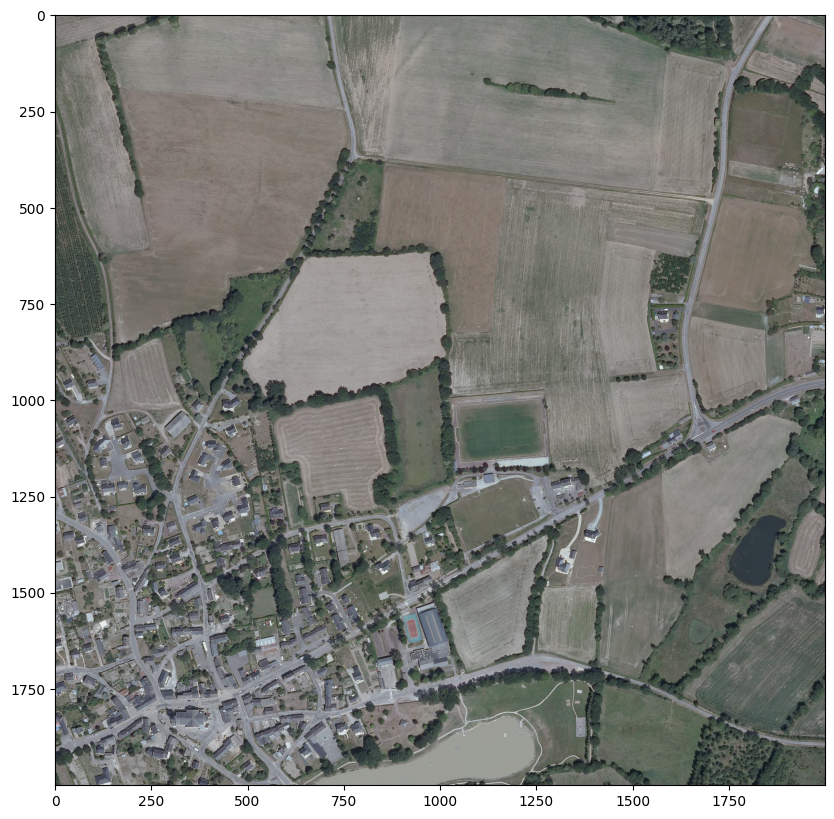

In [94]:
plt.subplots(figsize=(10, 10))
plt.imshow(ortho_rgb[8000:,:2000])

In [5]:
# Create output directories if they don't exist
if not os.path.exists(config['rgb_older_vignettes_path'] + f'rgb_{year}/'):
    os.makedirs(config['rgb_older_vignettes_path'] + f'rgb_{year}/')
if not os.path.exists(config['rgb_older_vignettes_path'] + f'rgb_{year}/rgb_{year}_{rgb_x}_{rgb_y}/'):
    os.makedirs(config['rgb_older_vignettes_path'] + f'rgb_{year}/rgb_{year}_{rgb_x}_{rgb_y}/')


In [6]:
w=2000
h=2000

In [7]:
w-(config['img_size']+config['border']*2)+1

1713

In [8]:
config['border']

16

In [9]:
config['img_size']# +config['border']*2

256

In [10]:
w-(config['img_size'])+1

1745

In [95]:

# Read existing DataFrame or create a new one
# if os.path.exists(config['stat_older_vignettes_path']):
#     df = pd.read_csv(config['stat_older_vignettes_path'], index_col="Unnamed: 0")
# else:
#     df = pd.DataFrame(columns=config['stat_older_vignettes_col'])

shapes = {}

for mnhc_x in tqdm(range(0,5)):
    for mnhc_y in range(0,5):
        for x in range(0, w-(config['img_size'])+1, config['img_size']):
            for y in range(0, h-(config['img_size'])+1, config['img_size']):

                print(x, y)
                crop_rgb = ortho_rgb[np.max([0, mnhc_y*h+y-config['border']]): mnhc_y*h+y+config['img_size']+config['border'], np.max([0, mnhc_x*w+x-config['border']]): mnhc_x*w+x+config['img_size']+config['border'], :]

                pos = dept+'_'+str(int((int(rgb_x)+mnhc_x)*1000+x/2))+'_'+str(int((int(rgb_y)-mnhc_y)*1000+y/2))

                # cv2.imwrite(config['rgb_older_vignettes_path'] + f'rgb_{year}/rgb_{year}_{rgb_x}_{rgb_y}/' + f'rgb_{year}_' + str(pos) + '.jpg', crop_rgb)

                shapes[pos] = crop_rgb.shape
#                 # Calculate characteristics of the RGB crop and add to the DataFrame
#                 res = [year, pos, crop_rgb.sum()] + \
#                 np.mean(crop_rgb, axis=(0, 1)).tolist() + \
#                 np.std(crop_rgb, axis=(0, 1)).tolist() + \
#                 [np.mean(convolution(crop_rgb[:, :, 0], N=3)), np.mean(convolution(crop_rgb[:, :, 1], N=3)), np.mean(convolution(crop_rgb[:, :, 2], N=3))] + \
#                 [np.std(convolution(crop_rgb[:, :, 0], N=3)), np.std(convolution(crop_rgb[:, :, 1], N=3)), np.std(convolution(crop_rgb[:, :, 2], N=3))] 
#                 # vignette_data.append(res)

#                 # Append the list to the DataFrame
#                 df.loc[len(df) + len(set(range(df.index[-1]))-set(df.index))
#                 if len(df.index) > 0
#                 else 0] = res

            # If more images are needed, comment the break
            # break

# Drop duplicates and save the DataFrame to a CSV file
# df.drop_duplicates(subset='file').to_csv(config['stat_older_vignettes_path'])


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 158.28it/s]

0 0
0 256
0 512
0 768
0 1024
0 1280
0 1536
256 0
256 256
256 512
256 768
256 1024
256 1280
256 1536
512 0
512 256
512 512
512 768
512 1024
512 1280
512 1536
768 0
768 256
768 512
768 768
768 1024
768 1280
768 1536
1024 0
1024 256
1024 512
1024 768
1024 1024
1024 1280
1024 1536
1280 0
1280 256
1280 512
1280 768
1280 1024
1280 1280
1280 1536
1536 0
1536 256
1536 512
1536 768
1536 1024
1536 1280
1536 1536
0 0
0 256
0 512
0 768
0 1024
0 1280
0 1536
256 0
256 256
256 512
256 768
256 1024
256 1280
256 1536
512 0
512 256
512 512
512 768
512 1024
512 1280
512 1536
768 0
768 256
768 512
768 768
768 1024
768 1280
768 1536
1024 0
1024 256
1024 512
1024 768
1024 1024
1024 1280
1024 1536
1280 0
1280 256
1280 512
1280 768
1280 1024
1280 1280
1280 1536
1536 0
1536 256
1536 512
1536 768
1536 1024
1536 1280
1536 1536
0 0
0 256
0 512
0 768
0 1024
0 1280
0 1536
256 0
256 256
256 512
256 768
256 1024
256 1280
256 1536
512 0
512 256
512 512
512 768
512 1024
512 1280
512 1536
768 0
768 256
768 512
768 768
7

In [63]:
shapes = dict(sorted(shapes.items()))

In [67]:
[*shapes.values()][0]

(288, 272, 3)

In [15]:
from utils import get_random_indices, get_file_paths, load_custom_model # , interpolate_segformer_outputs

from from_preprocessing_to_training import AttentionUnet, Losses
from preprocessing import LoadPreprocessImages

import tensorflow as tf
from tensorflow import keras
from segmentation_mask_overlay import overlay_masks

import itertools
from glob import glob

In [16]:
losses = Losses()

In [17]:
attention_unet = AttentionUnet((256, 256, 3))

In [18]:
model_path = "output_models/35_14_61_49/2012/intermediary_AttentionUnet_3600_trains_wavelet_noise_30_epochs_img_size_256_LR_0_001_BS_64_FocalTverskyLoss_92acc_7666iou.h5"
# "output_models/AttentionUnet_600_trains__epochs_1_no_equalizing_with_normalizing_img_size_256_LR_0_001_BS_32_FocalTverskyoLoss.h5"

In [19]:
custom_objects_list=[attention_unet.expend_as, attention_unet.AttnGatingBlock, attention_unet.UnetConv2D, attention_unet.UnetGatingSignal, losses.tversky, losses.focal_tversky]

In [20]:
model_2012 = load_custom_model(model_path=model_path, custom_objects_list=custom_objects_list)


In [21]:
year = 2012

In [22]:
img_row = 256
img_col = 256
img_chan = 3
gt_chan = 1
epochnum = 10
val_split = 0.2
input_size = (img_row, img_col, img_chan)

older_img_list = sorted(
    list(
        itertools.chain.from_iterable(
            [glob(i + "*.jpg") for i in glob(f"vignettes/rgb_older/rgb_{year}/*/", recursive=True)]
        )
    )
)

# n = 100
# random_indices = get_random_indices(range(len(older_img_list)), n)
# random_indices.sort()
# older_img_list = np.array(older_img_list)[random_indices].tolist()

older_num_imgs = len(older_img_list)

older_orig_imgs = []
older_imgs = np.zeros((older_num_imgs, img_row, img_col, 3))


In [23]:
for i in tqdm(range(older_num_imgs)):
    older_tmp_img = plt.imread(older_img_list[i])
    older_orig_imgs.append(older_tmp_img)

    older_img = cv2.resize(older_tmp_img, (img_col,img_row), interpolation=cv2.INTER_NEAREST)

    # img = equalize_histogram(img, convert_to_tensors=False)
    
    if older_img.max() > 1:
        older_img = older_img/255.
        
    older_imgs[i] = older_img

100%|█████████████████████████████████████████████████████████████████████████████| 1225/1225 [00:01<00:00, 624.98it/s]


In [24]:
val_preds_2012 = model_2012.predict(older_imgs)

39/39 [==============================] - 43s 1s/step


In [25]:
idx = 1

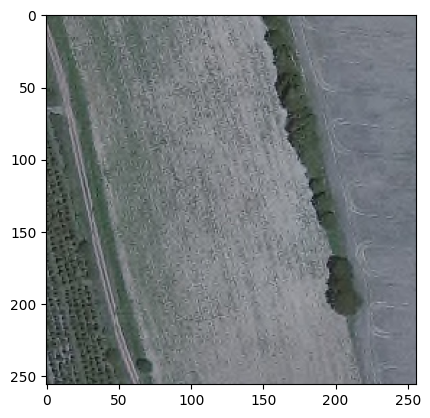

In [26]:
plt.imshow(older_imgs[idx])

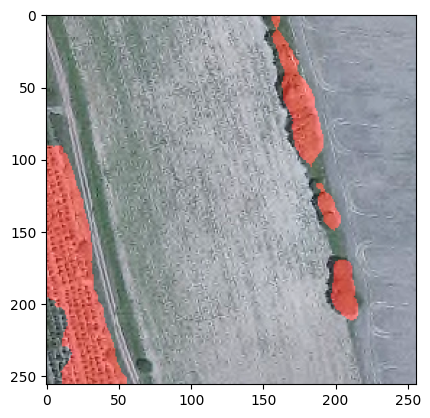

In [27]:
fig = overlay_masks(older_imgs[idx], np.round(val_preds_2012[idx]), colors=[(1, 0, 0)])
plt.imshow(fig)

In [110]:
i = 28
mask_1 = cv2.resize(val_preds_2012[i], ([*shapes.values()][i][0], [*shapes.values()][i][1]), interpolation=cv2.INTER_LINEAR)
img_1 = cv2.resize(older_imgs[i], ([*shapes.values()][i][0], [*shapes.values()][i][1]), interpolation=cv2.INTER_LINEAR)

In [111]:
i = 29
mask_2 = cv2.resize(val_preds_2012[i], ([*shapes.values()][i][0], [*shapes.values()][i][1]), interpolation=cv2.INTER_LINEAR)
img_2 = cv2.resize(older_imgs[i], ([*shapes.values()][i][0], [*shapes.values()][i][1]), interpolation=cv2.INTER_LINEAR)

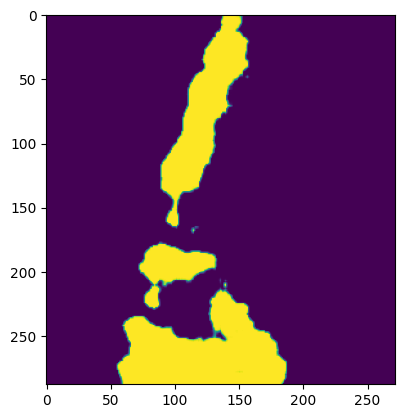

In [112]:
plt.imshow(mask_1)

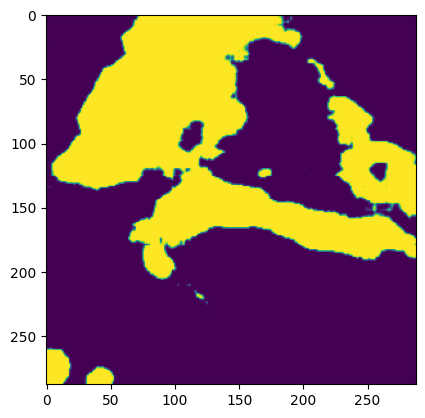

In [113]:
plt.imshow(mask_2)

In [114]:
mask_1.shape, mask_2.shape

((288, 272), (288, 288))

In [115]:
img_1.shape, img_2.shape

((288, 272, 3), (288, 288, 3))

In [47]:
a = ortho_rgb[np.max([0, 0*h+0-config['border']]): 0*h+0+config['img_size']+config['border'], np.max([0, 0*w+0-config['border']]): 0*w+0+config['img_size']+config['border'], :]
b = ortho_rgb[np.max([0, 0*h+256-config['border']]): 0*h+256+config['img_size']+config['border'], np.max([0, 0*w+0-config['border']]): 0*w+0+config['img_size']+config['border'], :]

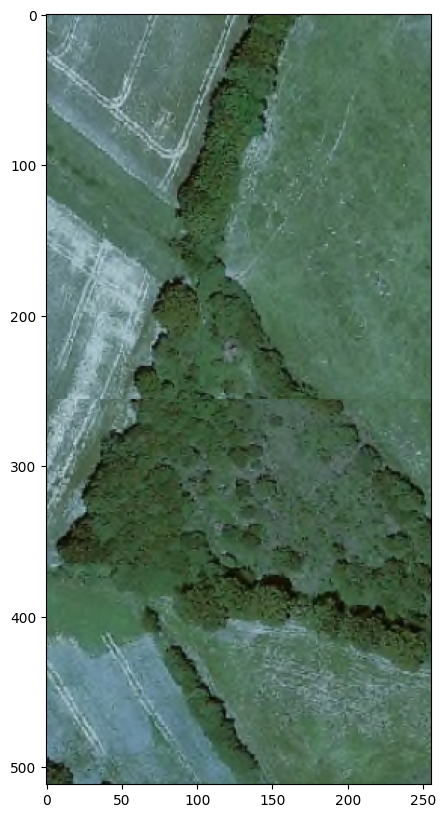

In [116]:
plt.subplots(figsize=(10,10))
plt.imshow(np.concatenate([img_1[:256,:256], img_2[16:256+16,:256]]))

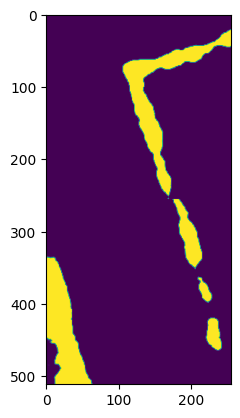

In [45]:
plt.imshow(np.concatenate([mask_1[:256,:256], mask_2[16:256+16,:256]]))

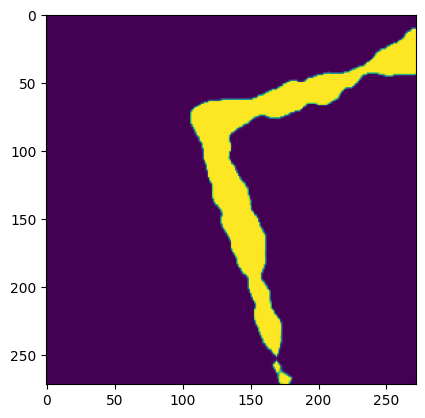

In [37]:
plt.imshow(cv2.resize(val_preds_2012[0], (shapes[0][0], shapes[0][1]), interpolation=cv2.INTER_LINEAR))

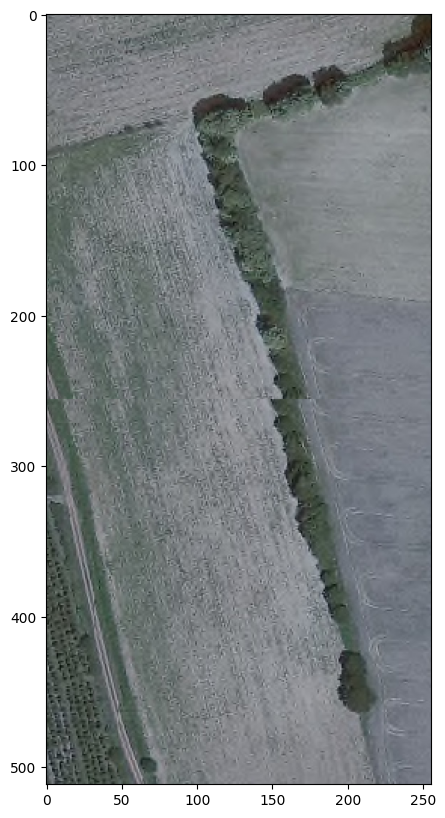

In [105]:
plt.subplots(figsize=(10,10))
plt.imshow(np.concatenate([older_imgs[0], older_imgs[1]]))

In [97]:
np.round(val_preds_2012[0]).shape

(256, 256, 1)

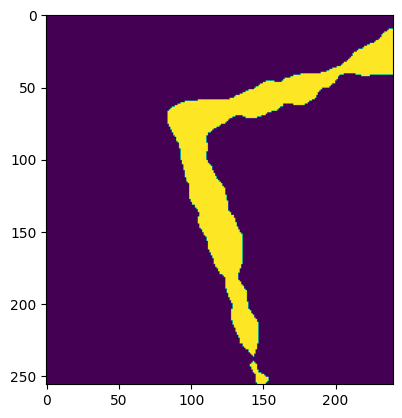

In [96]:
plt.imshow(np.round(val_preds_2012[0])[:256,16:256+16])

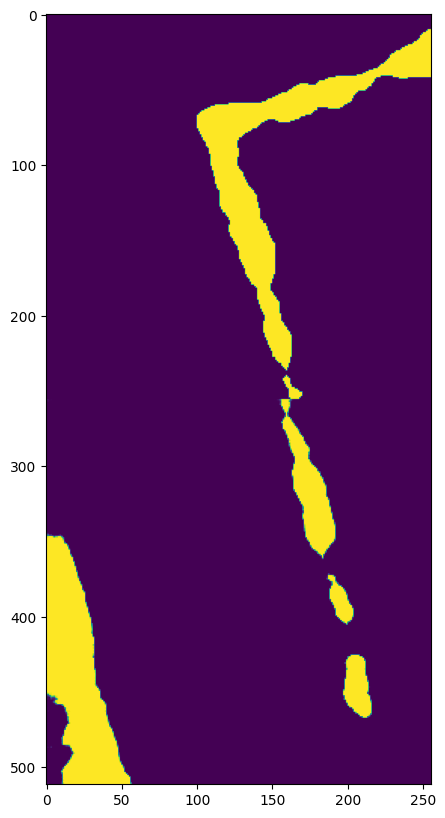

In [99]:
plt.subplots(figsize=(10,10))
plt.imshow(np.concatenate([np.round(val_preds_2012[0])[:256,16:256+16], val_preds_2012[1]]))

In [ ]:
import os
import cv2
import numpy as np

# Define the paths and parameters
config = {
    'rgb_older_vignettes_path': '/path/to/your/output/directory/',
    'img_size': 256,
    'border': 16,
}

# Initialize the global mask with the original shape
global_mask_shape = (10000, 10000)
global_mask = np.zeros(global_mask_shape, dtype=np.uint8)

# Iterate over the small images and reassemble the masks
for mnhc_x in range(0, 5):
    for mnhc_y in range(0, 5):
        for x in range(0, w - (config['img_size']) + 1, config['img_size']):
            for y in range(0, h - (config['img_size']) + 1, config['img_size']):
                pos = dept + '_' + str(int((int(rgb_x) + mnhc_x) * 1000 + x / 2)) + '_' + str(int((int(rgb_y) - mnhc_y) * 1000 + y / 2))

                # Load the predicted mask (replace with your own loading code)
                mask_path = os.path.join(config['rgb_older_vignettes_path'], f'predicted_masks/{pos}.png')
                predicted_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

                # Resize the mask to the original size
                predicted_mask_resized = cv2.resize(predicted_mask, (config['img_size'] + 2 * config['border'], config['img_size'] + 2 * config['border']))

                # Remove the border
                cropped_mask = predicted_mask_resized[config['border']:-config['border'], config['border']:-config['border']]

                # Calculate the coordinates for pasting
                paste_x = mnhc_x * w + x
                paste_y = mnhc_y * h + y

                # Paste the cropped mask into the global mask
                global_mask[paste_y:paste_y + cropped_mask.shape[0], paste_x:paste_x + cropped_mask.shape[1]] = cropped_mask

# Save the global mask to a file
cv2.imwrite('global_mask.png', global_mask)
